In [2]:
import sys
import numpy as np
import cv2

# 영상 불러오기
src1 = cv2.imread('img1.jpeg', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('img2.jpeg', cv2.IMREAD_GRAYSCALE)
#src1 = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)
#src2 = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print('Image load failed!')
    sys.exit()

In [3]:
# 특징점 알고리즘 객체 생성 (KAZE, AKAZE, ORB 등)
feature = cv2.KAZE_create()
#feature = cv2.AKAZE_create()
#feature = cv2.ORB_create()

# 특징점 검출 및 기술자 계산
kp1, desc1 = feature.detectAndCompute(src1, None)
kp2, desc2 = feature.detectAndCompute(src2, None)

In [4]:
# 특징점 매칭
matcher = cv2.BFMatcher_create()
#matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = matcher.match(desc1, desc2)

# 좋은 매칭 결과 선별
matches = sorted(matches, key=lambda x: x.distance)

#상위 80개만 선별
good_matches = matches[:80]

print('# of kp1:', len(kp1))
print('# of kp2:', len(kp2))
print('# of matches:', len(matches))
print('# of good_matches:', len(good_matches))

# of kp1: 12475
# of kp2: 11244
# of matches: 12475
# of good_matches: 80


In [6]:
# 호모그래피 계산
pts1 = np.array([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)
pts2 = np.array([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)
H, _ = cv2.findHomography(pts1, pts2, cv2.USAC_MAGSAC)
#good_matches가 dematch의 리스트 80개를 하나하나 받아서 m에 받는다. dematch type에는 queryIndex와 trainIndex가있는데 
#queryIdx는 1번이미지 키포인트 번호이다. 이걸 kp1에대한 인덱스 번호로 준다. 1번영상에서 kpt의 인덱스에 해당하는것을 찾아서 pt라는 점의 좌표를 받아온다. pt는 실수와 좌표를 갖는 두개짜리 튜플이다. 얘들을 ndarray로 받는다. 
#pte1이 N,1,2로 받아야 하기때문에 pts1=에서 reshape함수를 사용해 바꿔준다.
#호모그래피 perspectiveTransform을 H로 받았고, 마스크는 받지않았다.

# # 호모그래피를 이용하여 기준 영상 영역 표시
# dst = cv2.drawMatches(src1, kp1, src2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# (h, w) = src1.shape[:2]
# corners1 = np.array([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2).astype(np.float32)
# corners2 = cv2.perspectiveTransform(corners1, H)

# #perspectiveTransform은 H를 가지고 어디로 이동하는지 좌표계산을 하는것이다. corners1은 N,1,2형태의 shape이어야한다. 
# corners2 = corners2 + np.float32([w, 0])

In [8]:
(h, w) = src2.shape[:2]
dst = cv2.warpPerspective(src2, H, (w, h))


# #drawMatches를 호출하면 가로로 붙여서 하나로 만들어주는데 2번영상의 좌표가 1번영상의 가로 크기만큼 쉬프트된다. 그걸 반영하기위해 float32를 더하고 corners에 저장
# cv2.polylines(dst, [np.int32(corners2)], True, (0, 255, 0), 2, cv2.LINE_AA)

# cv2.namedWindow('dst', cv2.WINDOW_NORMAL)
# cv2.imshow('dst', dst)
# cv2.waitKey()
# cv2.destroyAllWindows()

/usr/local/lib/python3.10/site-packages/matplotlib/_api/__init__.py:125: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if val not in values:


ValueError: array([[116, 115, 115, ...,   0,   0,   0],
       [115, 115, 116, ...,   0,   0,   0],
       [115, 114, 114, ...,   0,   0,   0],
       ...,
       [122, 123, 120, ...,   0,   0,   0],
       [123, 124, 122, ...,   0,   0,   0],
       [121, 122, 121, ...,   0,   0,   0]], dtype=uint8) is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

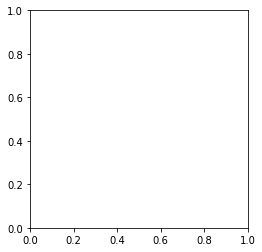